In [1]:
import pandas as pd
import joblib
import numpy as np
from scipy.sparse import hstack
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import seaborn as sns
import joblib

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("vader_lexicon", quiet=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Load the dataset
df = pd.read_csv("Reviews.csv")

In [3]:
# Randomly sample 100,000 rows with reproducibility
df = df.sample(n=100000, random_state=42)

print("Sampled dataset shape:", df.shape)

Sampled dataset shape: (100000, 10)


In [4]:
# Display first 5 rows
print("Head of the dataset:")
display(df.head())

Head of the dataset:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


In [5]:
# Display last 5 rows
print("\nTail of the dataset:")
display(df.tail())


Tail of the dataset:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
62377,62378,B000CQG8KS,A1XBUHT0JKF82F,K. Walker,1,1,5,1287878400,Awesome tea bursting with flavor,Sometimes more is NOT better. In this instanc...
191346,191347,B001SIY5NQ,A1RTUXC9W70SIF,S. Guffey,0,0,5,1242950400,The Best,This is the best beef jerky that I have found ...
537546,537547,B0052DH4QS,A2LH2I0CZ3I6JT,CC,0,1,5,1317859200,Healthy Beef Jerky Treats,Milo's Kitchen Beef Jerky is one of the few tr...
407302,407303,B000NU3ZYU,A1EGGYQDTS3BK6,Beawolf,0,0,5,1332028800,Tasty,"The hotlix scorpion sucker is a pretty tasty, ..."
174904,174905,B004PX6TOE,A29QUBIQ22ZP6S,Sharon Brubaker,0,0,5,1342396800,AMAZING!!,Amazing taste... not too salty... The 3oz bag ...


In [6]:
# Display dataset information
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 165256 to 174904
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      100000 non-null  int64 
 1   ProductId               100000 non-null  object
 2   UserId                  100000 non-null  object
 3   ProfileName             99997 non-null   object
 4   HelpfulnessNumerator    100000 non-null  int64 
 5   HelpfulnessDenominator  100000 non-null  int64 
 6   Score                   100000 non-null  int64 
 7   Time                    100000 non-null  int64 
 8   Summary                 99991 non-null   object
 9   Text                    100000 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.4+ MB


In [7]:
# Display dataset shape
print("\nDataset shape (rows, columns):")
print(df.shape)


Dataset shape (rows, columns):
(100000, 10)


In [8]:
columns_to_drop = ["Id", "UserId", "ProfileName"]

df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 165256 to 174904
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               100000 non-null  object
 1   HelpfulnessNumerator    100000 non-null  int64 
 2   HelpfulnessDenominator  100000 non-null  int64 
 3   Score                   100000 non-null  int64 
 4   Time                    100000 non-null  int64 
 5   Summary                 99991 non-null   object
 6   Text                    100000 non-null  object
dtypes: int64(4), object(3)
memory usage: 6.1+ MB


In [9]:
# Prepare text column(s)

# Combine Summary + Text (recommended for richer signal)
df["Summary"] = df["Summary"].fillna("")
df["Text"] = df["Text"].fillna("")
df["review_text"] = (df["Summary"].astype(str) + " " + df["Text"].astype(str)).str.strip()

# Text preprocessing helpers

def strip_html(text: str) -> str:
    return re.sub(r"<[^>]+>", " ", text)

def remove_urls(text: str) -> str:
    return re.sub(r"http\S+|www\.\S+", " ", text)

def remove_non_letters(text: str) -> str:
    # Keep only letters and spaces
    return re.sub(r"[^a-zA-Z\s]", " ", text)

def normalize_whitespace(text: str) -> str:
    return re.sub(r"\s+", " ", text).strip()

STOPWORDS = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text: str) -> str:
    text = str(text).lower()
    text = strip_html(text)
    text = remove_urls(text)
    text = remove_non_letters(text)
    text = normalize_whitespace(text)

    tokens = text.split()
    tokens = [t for t in tokens if t not in STOPWORDS and len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return " ".join(tokens)

# Apply preprocessing
df["review_text_clean"] = df["review_text"].apply(preprocess_text)

# Drop empty cleaned rows
df = df[df["review_text_clean"].str.len() > 0].reset_index(drop=True)

# Quick check
df.head()

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,review_text,review_text_clean
0,B000EVG8J2,0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,Crunchy & Good Gluten-Free Sandwich Cookies! H...,crunchy good gluten free sandwich cooky tried ...
1,B0000BXJIS,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,great kitty treats My cat loves these treats. ...,great kitty treat cat love treat ever find hou...
2,B008FHUFAU,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,COFFEE TASTE A little less than I expected. I...,coffee taste little less expected tends muddy ...
3,B006BXV14E,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",So the Mini-Wheats were too big? First there w...,mini wheat big first frosted mini wheat origin...
4,B007I7Z3Z0,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,Great Taste . . . and I want to congratulate t...,great taste want congratulate graphic artist p...


In [10]:
# Safety: ensure text column is valid
df["review_text_clean"] = df["review_text_clean"].fillna("").astype(str)

# Helpfulness ratio (credibility signal)
# +1 avoids division by zero
df["helpfulness_ratio"] = (
    df["HelpfulnessNumerator"] /
    (df["HelpfulnessDenominator"] + 1)
)

# Review length (engagement proxy)
df["review_length"] = df["review_text_clean"].str.len()


# Drop original rating & helpfulness columns after engineering
cols_to_drop_step2 = [
    "HelpfulnessNumerator",
    "HelpfulnessDenominator"  # used only for label creation earlier
]

df = df.drop(columns=cols_to_drop_step2)

# Validation
print("Updated dataset info:")
df.info()

Updated dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductId          99999 non-null  object 
 1   Score              99999 non-null  int64  
 2   Time               99999 non-null  int64  
 3   Summary            99999 non-null  object 
 4   Text               99999 non-null  object 
 5   review_text        99999 non-null  object 
 6   review_text_clean  99999 non-null  object 
 7   helpfulness_ratio  99999 non-null  float64
 8   review_length      99999 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [11]:
columns_to_drop_final = ["Summary", "Text", "review_text"]

df = df.drop(columns=columns_to_drop_final)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductId          99999 non-null  object 
 1   Score              99999 non-null  int64  
 2   Time               99999 non-null  int64  
 3   review_text_clean  99999 non-null  object 
 4   helpfulness_ratio  99999 non-null  float64
 5   review_length      99999 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [12]:
# Check missing values per column
null_counts = df.isnull().sum()

print("Missing values per column:")
print(null_counts)

Missing values per column:
ProductId            0
Score                0
Time                 0
review_text_clean    0
helpfulness_ratio    0
review_length        0
dtype: int64


In [13]:
# Check duplicate rows
duplicate_count = df.duplicated().sum()

print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 17


In [14]:
# Check number of duplicate rows before dropping
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_count}")

# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Verify duplicates are removed
duplicate_count_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count_after}")

# Confirm updated dataset shape
print("Dataset shape after removing duplicates:", df.shape)

Number of duplicate rows before removal: 17
Number of duplicate rows after removal: 0
Dataset shape after removing duplicates: (99982, 6)


In [15]:
# OUTLIER CHECK

# Select numeric columns only
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Initialise outlier flag container
outlier_flags = pd.DataFrame(index=df.index)

# IQR-based outlier detection
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_flags[col] = (df[col] < lower_bound) | (df[col] > upper_bound)

# Any row flagged as outlier in at least one numeric column
total_outliers = outlier_flags.any(axis=1).sum()
total_rows = df.shape[0]

outlier_percentage = round((total_outliers / total_rows) * 100, 2)

# Results
print(f"Percentage of total outliers in dataset: {outlier_percentage}%")

Percentage of total outliers in dataset: 22.73%


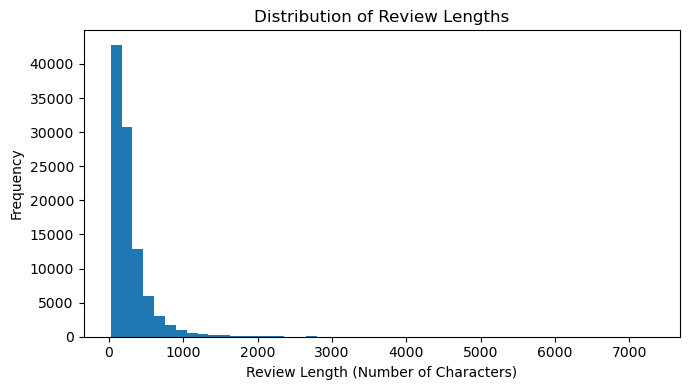

In [16]:
plt.figure(figsize=(7, 4))
plt.hist(
    df["review_length"],
    bins=50
)
plt.xlabel("Review Length (Number of Characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.tight_layout()
plt.show()

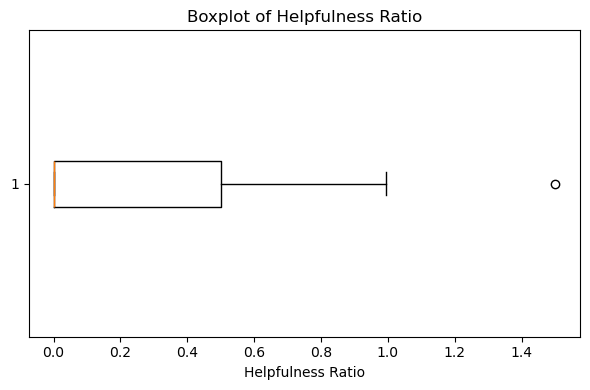

In [17]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["helpfulness_ratio"], vert=False)
plt.xlabel("Helpfulness Ratio")
plt.title("Boxplot of Helpfulness Ratio")
plt.tight_layout()
plt.show()

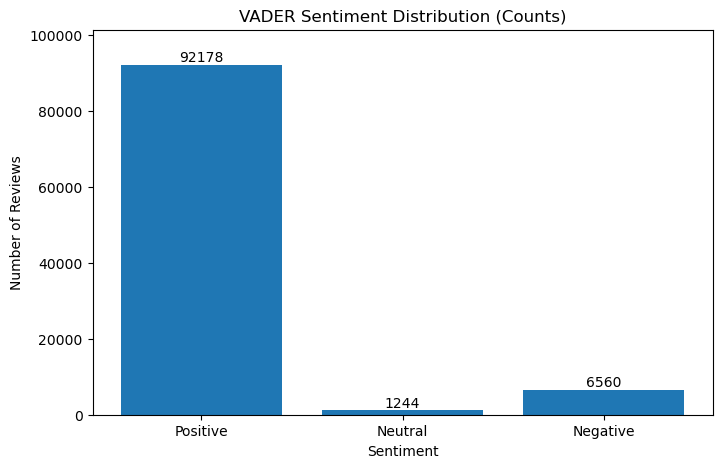

,review_text_clean,vader_compound,vader_sentiment
0,crunchy good gluten free sandwich cooky tried ...,0.9887,Positive
1,great kitty treat cat love treat ever find hou...,0.9890,Positive
2,coffee taste little less expected tends muddy ...,0.4588,Positive
3,mini wheat big first frosted mini wheat origin...,0.9918,Positive
4,great taste want congratulate graphic artist p...,0.9797,Positive


In [18]:
# VADER scoring

sia = SentimentIntensityAnalyzer()

df["vader_compound"] = df["review_text_clean"].astype(str).apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

def vader_label(c):
    if c >= 0.05:
        return "Positive"
    elif c <= -0.05:
        return "Negative"
    return "Neutral"

df["vader_sentiment"] = df["vader_compound"].apply(vader_label)

# Bar chart with values (counts)
sent_order = ["Positive", "Neutral", "Negative"]
sent_counts = (
    df["vader_sentiment"]
    .value_counts()
    .reindex(sent_order)
    .fillna(0)
    .astype(int)
)

plt.figure(figsize=(8, 5))
bars = plt.bar(sent_counts.index, sent_counts.values)

plt.title("VADER Sentiment Distribution (Counts)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Add value labels on bars
for b in bars:
    h = b.get_height()
    plt.text(
        b.get_x() + b.get_width() / 2,
        h,
        f"{h}",
        ha="center",
        va="bottom"
    )

plt.ylim(0, sent_counts.max() * 1.10 if sent_counts.max() > 0 else 1)
plt.show()

# Preview scores
df[["review_text_clean", "vader_compound", "vader_sentiment"]].head()

In [19]:
# Target variable (y)

df["success_label"] = (
    (df["Score"] >= 4) &
    (df["vader_sentiment"] == "Positive")
).astype(int)

# Check class distribution
print(df["success_label"].value_counts())

success_label
1    76379
0    23603
Name: count, dtype: int64


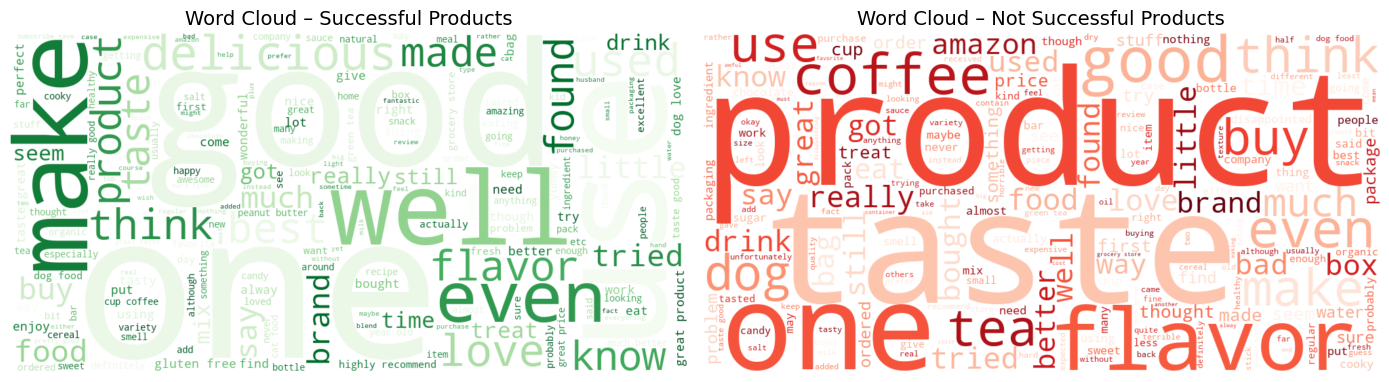

In [20]:
# Separate text by class
text_successful = " ".join(
    df[df["success_label"] == 1]["review_text_clean"].astype(str)
)

text_not_successful = " ".join(
    df[df["success_label"] == 0]["review_text_clean"].astype(str)
)

# Word cloud for Successful products
wordcloud_success = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200,
    colormap="Greens",
    random_state=42
).generate(text_successful)

# Word cloud for Not Successful products
wordcloud_not_success = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200,
    colormap="Reds",
    random_state=42
).generate(text_not_successful)

# Plot both word clouds side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_success, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Successful Products", fontsize=14)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_success, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Not Successful Products", fontsize=14)

plt.tight_layout()
plt.show()

In [21]:
# Ensure text is string and non-null
text_series = df["review_text_clean"].fillna("").astype(str)

# TF-IDF Vectoriser (tuned for large datasets)
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1, 2),      # unigrams + bigrams (set to (1,1) if you want simpler)
    min_df=5,                # ignore very rare terms
    max_df=0.90,             # ignore very common terms
    max_features=50000       # cap features to control memory
)

# Fit + transform
X_text = tfidf.fit_transform(text_series)

# Feature names (useful for interpretation / feature importance)
feature_names = tfidf.get_feature_names_out()

print("TF-IDF matrix shape (rows, features):", X_text.shape)
print("Example features:", feature_names[:20])

TF-IDF matrix shape (rows, features): (99982, 50000)
Example features: ['aafco' 'aback' 'abandon' 'abandoned' 'abc' 'abdominal' 'ability' 'able'
 'able add' 'able amazon' 'able break' 'able buy' 'able chew' 'able close'
 'able continue' 'able digest' 'able drink' 'able eat' 'able enjoy'
 'able feed']


In [22]:
# Feature matrix (X) - Leakage Safe

X_numeric = df[
    ["helpfulness_ratio", "review_length"]
].values

# Combine TF-IDF + numeric features
X = hstack([X_text, X_numeric])

# Target
y = df["success_label"].values

print("Final X shape:", X.shape)
print("Final y shape:", y.shape)

Final X shape: (99982, 50002)
Final y shape: (99982,)


In [23]:
# Train–Test Split (Stratified)


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,      # 80/20 split
    random_state=42,
    stratify=y           # preserves class distribution
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:", {0: (y_train==0).sum(), 1: (y_train==1).sum()})
print("y_test distribution:", {0: (y_test==0).sum(), 1: (y_test==1).sum()})

X_train shape: (79985, 50002)
X_test shape: (19997, 50002)
y_train distribution: {0: 18882, 1: 61103}
y_test distribution: {0: 4721, 1: 15276}



AdaBoost Performance Metrics (Leakage-Safe)


,Metric,AdaBoost (%)
0,Accuracy,76.25%
1,Precision,93.32%
2,Recall,74.22%
3,F1-score,82.68%



AdaBoost Classification Report (%)


,precision,recall,f1-score,support
0,49.82,82.82,62.22,4721
1,93.32,74.22,82.68,15276
accuracy,76.25,76.25,76.25,0
macro avg,71.57,78.52,72.45,19997
weighted avg,83.05,76.25,77.85,19997


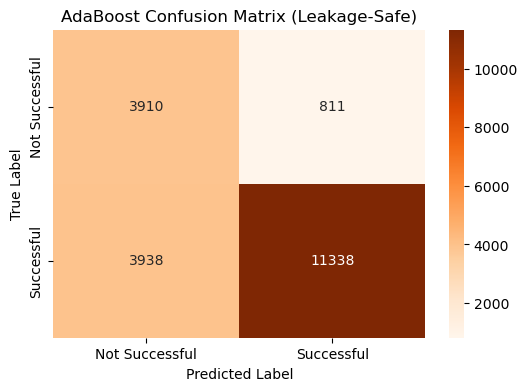

In [24]:
# Train AdaBoost (imbalance-aware via sample weights)


# Compute sample weights for imbalance handling (heavier weight for minority class 0)
class_counts = np.bincount(y_train)
w0 = 1.0 / class_counts[0]
w1 = 1.0 / class_counts[1]
sample_weight = np.where(y_train == 0, w0, w1)

# Slightly stronger weak learner to learn from text + metadata (still controlled)
base_learner = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=50,
    min_samples_leaf=25,
    random_state=42
)

ada_model = AdaBoostClassifier(
    estimator=base_learner,
    n_estimators=300,
    learning_rate=0.3,
    algorithm="SAMME",
    random_state=42
)

ada_model.fit(X_train, y_train, sample_weight=sample_weight)

# Predictions

y_pred_ada = ada_model.predict(X_test)

# Evaluation Metrics (2 decimals, %)


accuracy_ada = accuracy_score(y_test, y_pred_ada) * 100
precision_ada = precision_score(y_test, y_pred_ada) * 100
recall_ada = recall_score(y_test, y_pred_ada) * 100
f1_ada = f1_score(y_test, y_pred_ada) * 100

metrics_df_ada = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "AdaBoost (%)": [
        f"{accuracy_ada:.2f}%",
        f"{precision_ada:.2f}%",
        f"{recall_ada:.2f}%",
        f"{f1_ada:.2f}%"
    ]
})

print("\nAdaBoost Performance Metrics (Leakage-Safe)")
display(metrics_df_ada)

# Classification Report (2 decimals, %)


report_dict_ada = classification_report(
    y_test,
    y_pred_ada,
    output_dict=True
)

report_df_ada = pd.DataFrame(report_dict_ada).transpose()

# Convert to percentage & format
for col in ["precision", "recall", "f1-score"]:
    report_df_ada[col] = (report_df_ada[col] * 100).round(2)

report_df_ada["support"] = report_df_ada["support"].astype(int)

print("\nAdaBoost Classification Report (%)")
display(report_df_ada)

# Confusion Matrix

cm_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_ada,
    annot=True,
    fmt="d",            # raw counts
    cmap="Oranges",
    xticklabels=["Not Successful", "Successful"],
    yticklabels=["Not Successful", "Successful"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("AdaBoost Confusion Matrix (Leakage-Safe)")
plt.show()


XGBoost Performance Metrics (Leakage-Safe)


,Metric,XGBoost (%)
0,Accuracy,80.36%
1,Precision,94.02%
2,Recall,79.33%
3,F1-score,86.05%



XGBoost Classification Report (%)


,precision,recall,f1-score,support
0,55.58,83.67,66.79,4721
1,94.02,79.33,86.05,15276
accuracy,80.36,80.36,80.36,0
macro avg,74.80,81.50,76.42,19997
weighted avg,84.94,80.36,81.51,19997


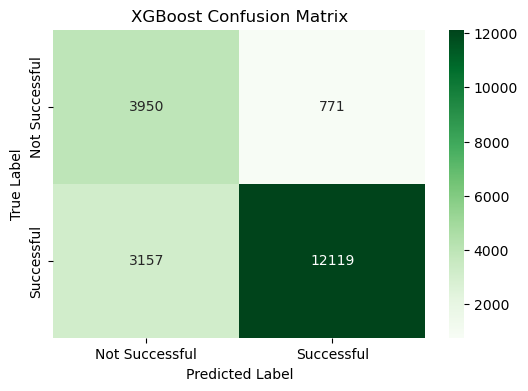

In [25]:
# Train XGBoost

# Imbalance handling
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,

    # Slightly stronger regularisation
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=10,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=1.0,
    reg_alpha=1.0,
    reg_lambda=10.0,

    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# Predictions


y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics (2 decimals, %)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
precision_xgb = precision_score(y_test, y_pred_xgb) * 100
recall_xgb = recall_score(y_test, y_pred_xgb) * 100
f1_xgb = f1_score(y_test, y_pred_xgb) * 100

metrics_df_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "XGBoost (%)": [
        f"{accuracy_xgb:.2f}%",
        f"{precision_xgb:.2f}%",
        f"{recall_xgb:.2f}%",
        f"{f1_xgb:.2f}%"
    ]
})

print("\nXGBoost Performance Metrics (Leakage-Safe)")
display(metrics_df_xgb)

# Classification Report (2 decimals, %)


report_dict_xgb = classification_report(
    y_test,
    y_pred_xgb,
    output_dict=True
)

report_df_xgb = pd.DataFrame(report_dict_xgb).transpose()

for col in ["precision", "recall", "f1-score"]:
    report_df_xgb[col] = (report_df_xgb[col] * 100).round(2)

report_df_xgb["support"] = report_df_xgb["support"].astype(int)

print("\nXGBoost Classification Report (%)")
display(report_df_xgb)

# Confusion Matrix


cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Not Successful", "Successful"],
    yticklabels=["Not Successful", "Successful"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")
plt.show()


Decision Tree Performance Metrics (Regularised)


,Metric,Decision Tree (%)
0,Accuracy,75.89%
1,Precision,92.36%
2,Recall,74.61%
3,F1-score,82.54%



Decision Tree Classification Report (%)


,precision,recall,f1-score,support
0,49.34,80.03,61.04,4721
1,92.36,74.61,82.54,15276
accuracy,75.89,75.89,75.89,0
macro avg,70.85,77.32,71.79,19997
weighted avg,82.20,75.89,77.46,19997


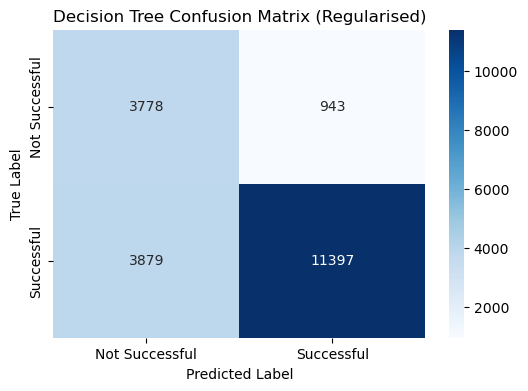

In [26]:
# Train Decision Tree (Regularised + imbalance-aware)

dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced",
    max_depth=20,
    min_samples_split=50,
    min_samples_leaf=25
)

dt_model.fit(X_train, y_train)

# Predictions


y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics (2 decimals, %)


accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
precision_dt = precision_score(y_test, y_pred_dt) * 100
recall_dt = recall_score(y_test, y_pred_dt) * 100
f1_dt = f1_score(y_test, y_pred_dt) * 100

metrics_df_dt = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Decision Tree (%)": [
        f"{accuracy_dt:.2f}%",
        f"{precision_dt:.2f}%",
        f"{recall_dt:.2f}%",
        f"{f1_dt:.2f}%"
    ]
})

print("\nDecision Tree Performance Metrics (Regularised)")
display(metrics_df_dt)

# Classification Report (2 decimals, %)


report_dict_dt = classification_report(
    y_test,
    y_pred_dt,
    output_dict=True
)

report_df_dt = pd.DataFrame(report_dict_dt).transpose()

for col in ["precision", "recall", "f1-score"]:
    report_df_dt[col] = (report_df_dt[col] * 100).round(2)

report_df_dt["support"] = report_df_dt["support"].astype(int)

print("\nDecision Tree Classification Report (%)")
display(report_df_dt)

# Confusion Matrix (raw counts only)


cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt="d",            # raw counts
    cmap="Blues",
    xticklabels=["Not Successful", "Successful"],
    yticklabels=["Not Successful", "Successful"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix (Regularised)")
plt.show()

In [27]:
# MODEL COMPARISON TABLE (All metrics in % with 2 decimals)


def evaluate_model(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "Accuracy (%)": round(accuracy_score(y_true, y_pred) * 100, 2),
        "Precision_Pos1 (%)": round(precision_score(y_true, y_pred, pos_label=1) * 100, 2),
        "Recall_Pos1 (%)": round(recall_score(y_true, y_pred, pos_label=1) * 100, 2),
        "F1_Pos1 (%)": round(f1_score(y_true, y_pred, pos_label=1) * 100, 2),
        "Macro_F1 (%)": round(f1_score(y_true, y_pred, average="macro") * 100, 2),
        "Weighted_F1 (%)": round(f1_score(y_true, y_pred, average="weighted") * 100, 2),
        "Recall_Class0 (%)": round(recall_score(y_true, y_pred, pos_label=0) * 100, 2),
        "Precision_Class0 (%)": round(precision_score(y_true, y_pred, pos_label=0) * 100, 2)
    }

results = []
conf_matrices = {}

# Decision Tree
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt))
conf_matrices["Decision Tree"] = confusion_matrix(y_test, y_pred_dt)

# AdaBoost
results.append(evaluate_model("AdaBoost", y_test, y_pred_ada))
conf_matrices["AdaBoost"] = confusion_matrix(y_test, y_pred_ada)

# XGBoost
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))
conf_matrices["XGBoost"] = confusion_matrix(y_test, y_pred_xgb)

# Comparison table sorted by Macro F1 (primary metric)

comparison_df = pd.DataFrame(results).sort_values(by="Macro_F1 (%)", ascending=False).reset_index(drop=True)

# Format all % columns to show 2 decimals + %
formatted_df = comparison_df.copy()
for col in formatted_df.columns:
    if col != "Model":
        formatted_df[col] = formatted_df[col].map(lambda x: f"{x:.2f}%")

print("Model Comparison Table (sorted by Macro F1 - primary metric)")
display(formatted_df)

# Best model based on Macro F1
best_model = comparison_df.loc[0, "Model"]
best_macro_f1 = comparison_df.loc[0, "Macro_F1 (%)"]
print(f"\nBest-fitted model based on Macro F1: {best_model} ({best_macro_f1:.2f}%)")

Model Comparison Table (sorted by Macro F1 - primary metric)


,Model,Accuracy (%),Precision_Pos1 (%),Recall_Pos1 (%),F1_Pos1 (%),Macro_F1 (%),Weighted_F1 (%),Recall_Class0 (%),Precision_Class0 (%)
0,XGBoost,80.36%,94.02%,79.33%,86.05%,76.42%,81.51%,83.67%,55.58%
1,AdaBoost,76.25%,93.32%,74.22%,82.68%,72.45%,77.85%,82.82%,49.82%
2,Decision Tree,75.89%,92.36%,74.61%,82.54%,71.79%,77.46%,80.03%,49.34%



Best-fitted model based on Macro F1: XGBoost (76.42%)


In [28]:
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [ ]:
import joblib
import numpy as np
from scipy.sparse import hstack

MODEL_PATH = "xgb_model.pkl"
VECTORIZER_PATH = "tfidf_vectorizer.pkl"

def safe_float(prompt, default=None, min_value=None, max_value=None):
    while True:
        raw = input(prompt).strip()
        if raw == "" and default is not None:
            val = float(default)
        else:
            try:
                val = float(raw)
            except ValueError:
                print("Invalid number. Try again.")
                continue

        if min_value is not None and val < min_value:
            print(f"Value must be >= {min_value}. Try again.")
            continue
        if max_value is not None and val > max_value:
            print(f"Value must be <= {max_value}. Try again.")
            continue
        return val

def safe_threshold(prompt, default=0.50):
    return safe_float(prompt, default=default, min_value=0.0, max_value=1.0)

def get_multiline_text():
    print("\nEnter review text (type END on a new line to finish):")
    lines = []
    while True:
        line = input()
        if line.strip() == "END":
            break
        lines.append(line)
    return "\n".join(lines).strip()

def main():
    try:
        model = joblib.load(MODEL_PATH)
        vectorizer = joblib.load(VECTORIZER_PATH)
    except Exception as e:
        print(f"Error: Could not load model/vectorizer.\n{e}")
        return

    print("\n==========================================")
    print("   Product Success Prediction (Text UI)   ")
    print("==========================================")

    while True:
        print("\nMenu")
        print("1. Predict")
        print("2. Exit")

        choice = input("Choose an option (1/2): ").strip()

        if choice == "2":
            print("Exiting. Goodbye.")
            break

        if choice != "1":
            print("Invalid choice. Please enter 1 or 2.")
            continue

        review_text = get_multiline_text()
        if not review_text:
            print("Review text cannot be empty. Try again.")
            continue

        # Inputs aligned with training features (Option A):
        # TF-IDF(review_text) + helpfulness_ratio + review_length (auto-derived)
        helpfulness_ratio = safe_float(
            "Helpfulness Ratio (0 to 1, default 0): ",
            default=0.0,
            min_value=0.0,
            max_value=1.0
        )

        # Automatically compute review length (do NOT ask user)
        review_length = len(review_text)

        threshold = safe_threshold("Decision Threshold 0-1 (default 0.50): ", default=0.50)

        # Build feature vector
        X_text = vectorizer.transform([review_text])
        X_numeric = np.array([[helpfulness_ratio, review_length]], dtype=float)
        X_input = hstack([X_text, X_numeric])

        # Predict probability
        try:
            proba_success = float(model.predict_proba(X_input)[0, 1])
        except Exception:
            pred = int(model.predict(X_input)[0])
            proba_success = float(pred)

        pred_label = "Successful" if proba_success >= threshold else "Not Successful"

        print("\n------------------------------------------")
        print(f"Prediction: {pred_label}")
        print(f"Probability of Success: {proba_success * 100:.2f}%")
        print(f"Used Threshold: {threshold:.2f}")
        print(f"Auto Review Length (chars): {review_length}")
        print("------------------------------------------")

if __name__ == "__main__":
    main()


   Product Success Prediction (Text UI)   

Menu
1. Predict
2. Exit
